In [16]:
# importing libraries
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import os

In [2]:
df_kiva_loans = pd.read_csv('kiva_loans.csv')
df_mpi = pd.read_csv('kiva_mpi_region_locations.csv')

In [3]:
# familiarity with data
df_mpi.head()


,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [4]:
# familiarity with data
df_kiva_loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [5]:
# display the name of the columns for further work
df_kiva_loans.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date'],
      dtype='object')

In [6]:
# find out the gender distribution among borrowers
df_kiva_loans['type_of_borrowers'] = [elem if elem in ['female', 
                                                     'male'] else 'group' for elem in df_kiva_loans['borrower_genders']]

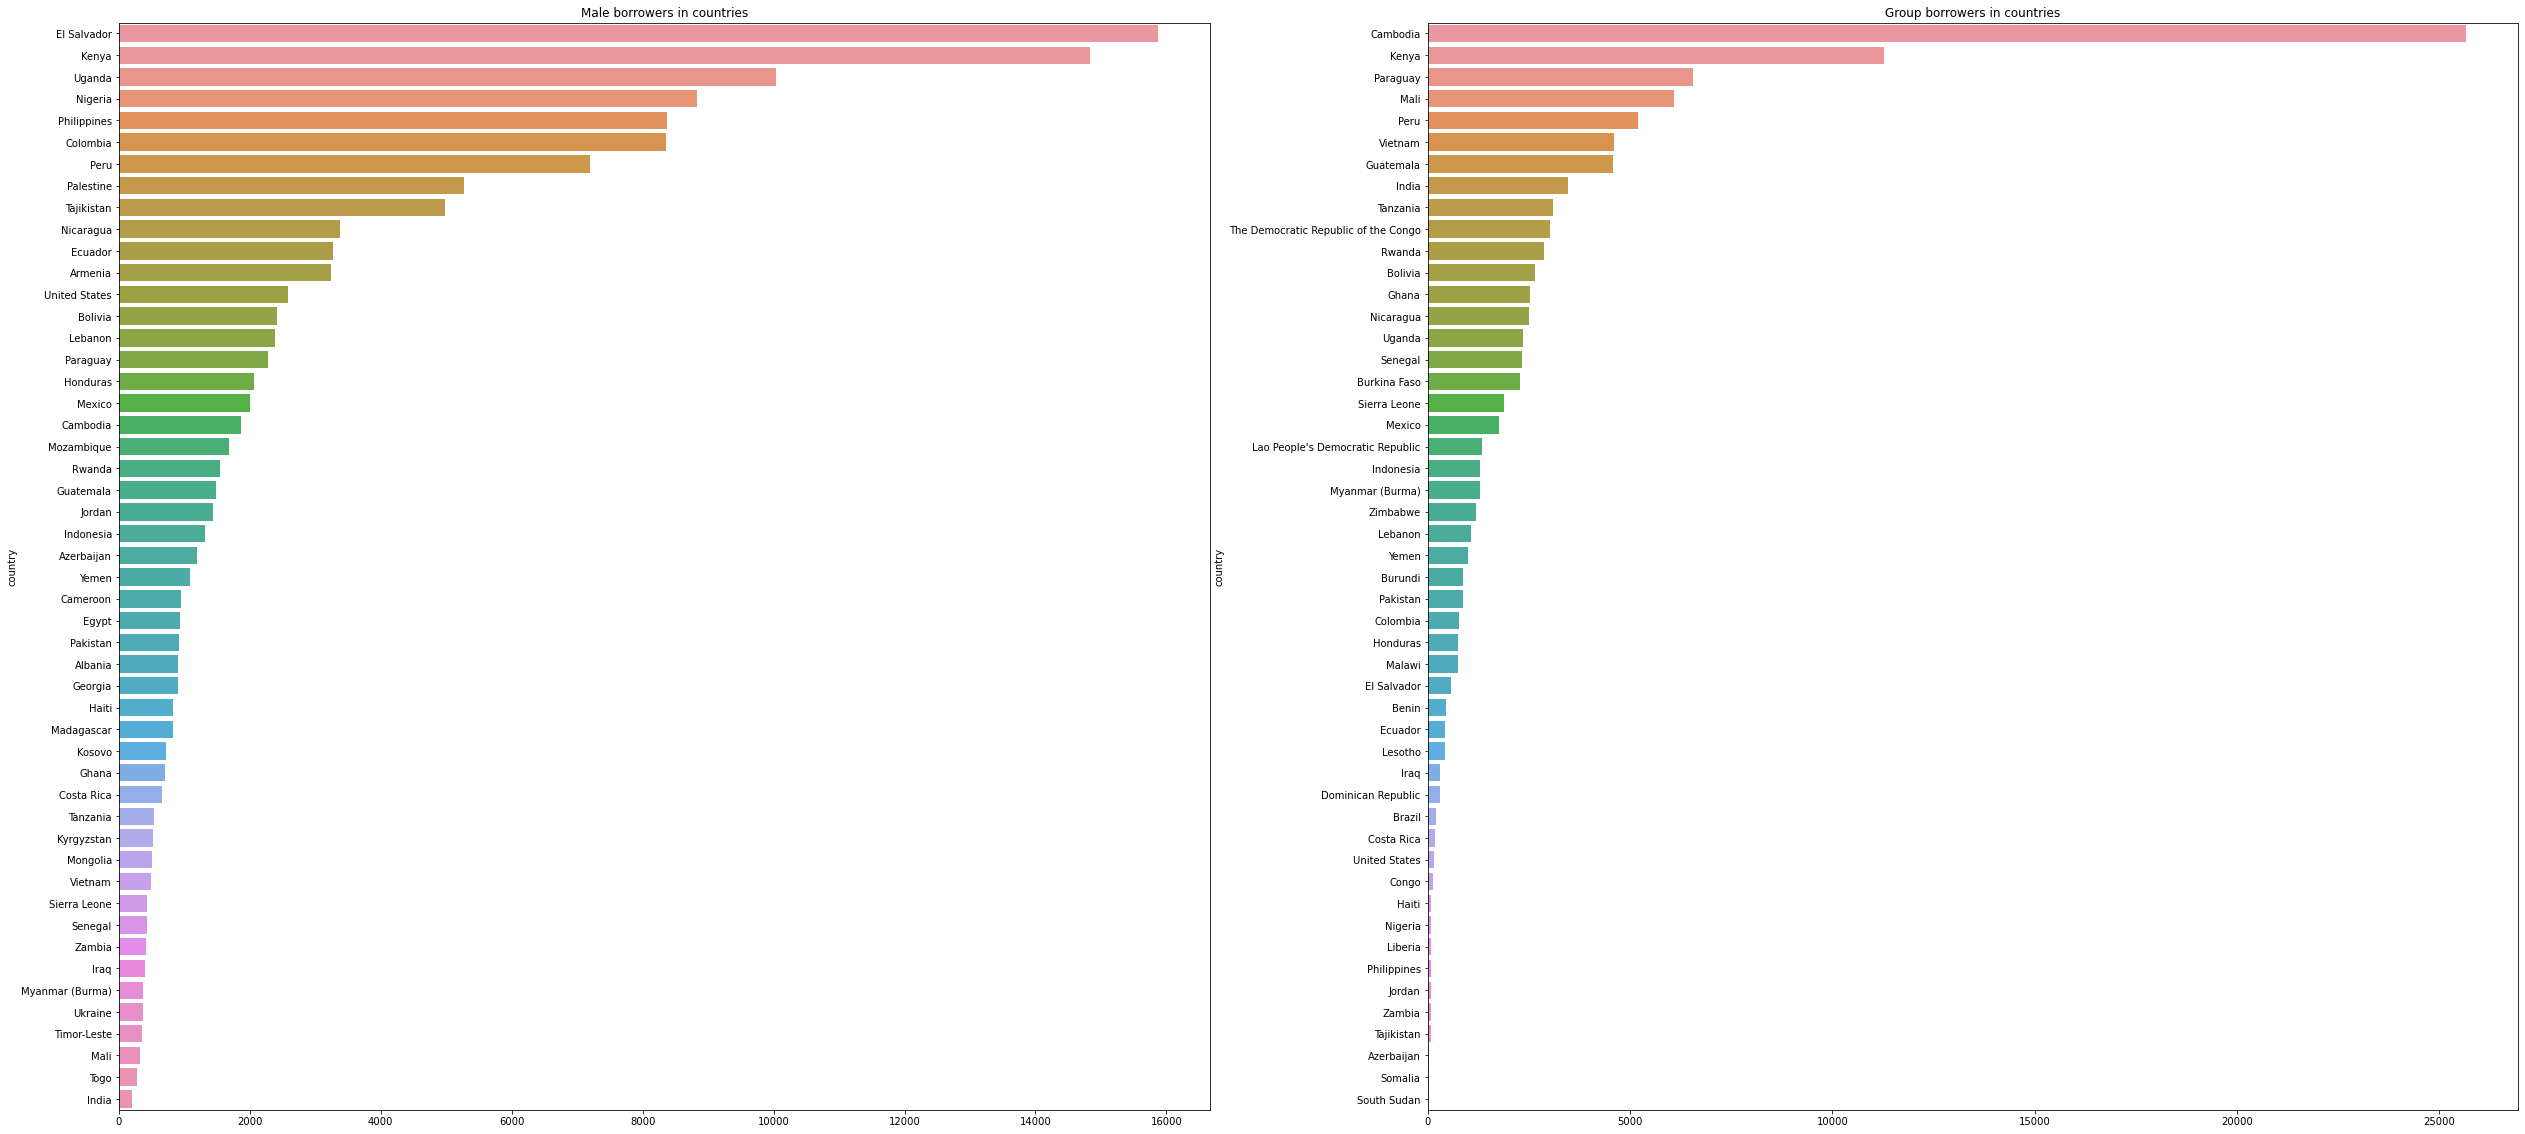

In [8]:
# creat dataframes for visualization
male = df_kiva_loans[['country', 'type_of_borrowers']].value_counts()\
                                             .unstack('type_of_borrowers')\
                                             .fillna(0)\
                                             .sort_values(by = 'male', ascending=False)['male']\
                                             .head(50)

group = df_kiva_loans[['country', 'type_of_borrowers']].value_counts()\
                                             .unstack('type_of_borrowers')\
                                             .fillna(0)\
                                             .sort_values(by = 'group', ascending=False)['group']\
                                             .head(50)
# build charts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(43,20))
sns.barplot(x=male.values, y=male.index, ax=axes[0])
axes[0].set_title('Male borrowers in countries')
sns.barplot(x=group.values, y=group.index, ax=axes[1])
axes[1].set_title('Group borrowers in countries')
plt.show()


---

<function matplotlib.pyplot.show(close=None, block=None)>

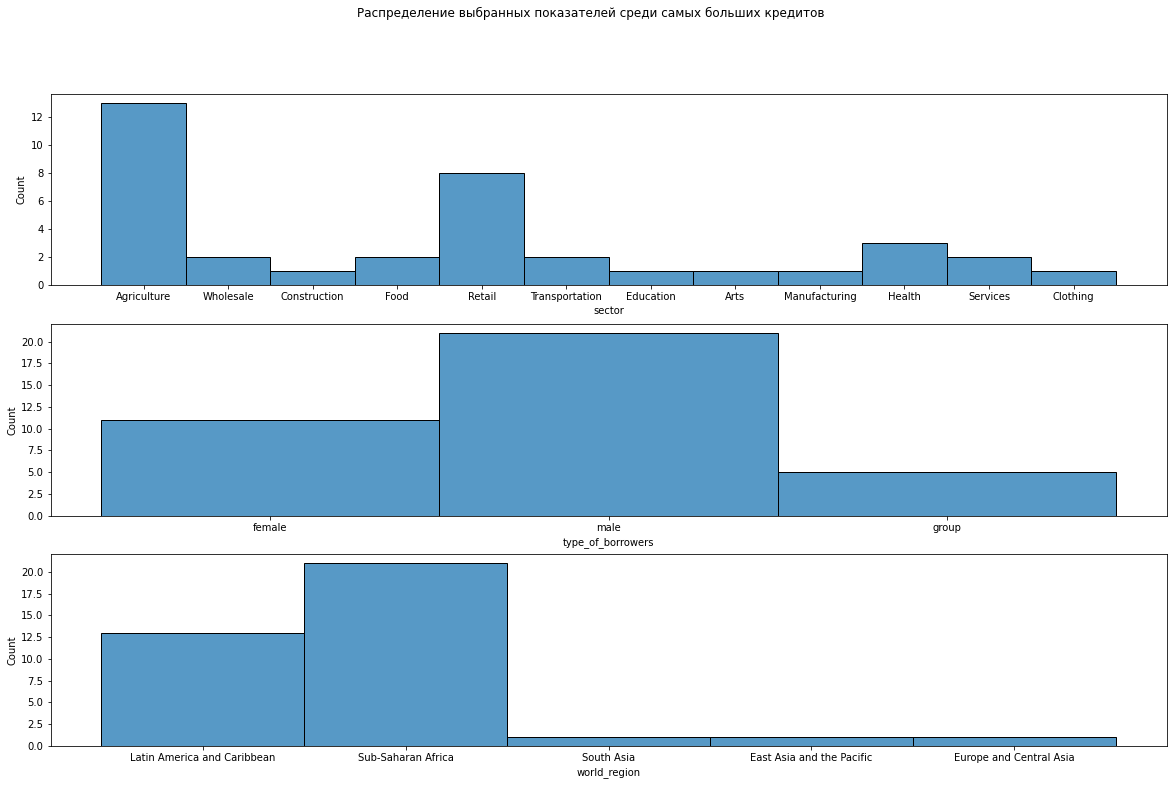

In [9]:
# creat dataframes for visualization
world_region = df_mpi[['country', 'world_region']].drop_duplicates()
df_41 = df_kiva_loans[['country', 'sector', 'type_of_borrowers', 'loan_amount', 'term_in_months']].sort_values('loan_amount', ascending=False)\
             .head(40)

df_41 = df_41.merge(world_region, on='country')

# build charts
columns=['sector', 'type_of_borrowers', 'world_region']
fig, axes = plt.subplots(nrows=3, figsize=(20,12))
for i, column in enumerate(columns):
    sns.histplot(data=df_41[column], ax=axes.ravel()[i])
fig.suptitle('Распределение выбранных показателей среди самых больших кредитов')
plt.show

---

Text(0.5, 0.98, 'Зависимость суммы кредитов от типа заемщика и регионов в мире')

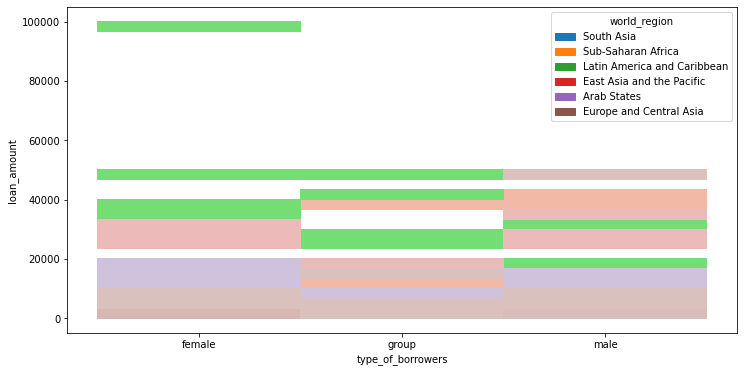

In [10]:
# build charts
plt.figure(figsize=(12, 6))
sns.histplot(data=df_kiva_loans.merge(world_region, on='country'), x='type_of_borrowers', y='loan_amount', hue='world_region',  bins=30,)
fig.suptitle('Зависимость суммы кредитов от типа заемщика и регионов в мире')

---

Text(0.5, 0.98, 'Зависимость пола заемщика от региона планеты, сектора экономики')

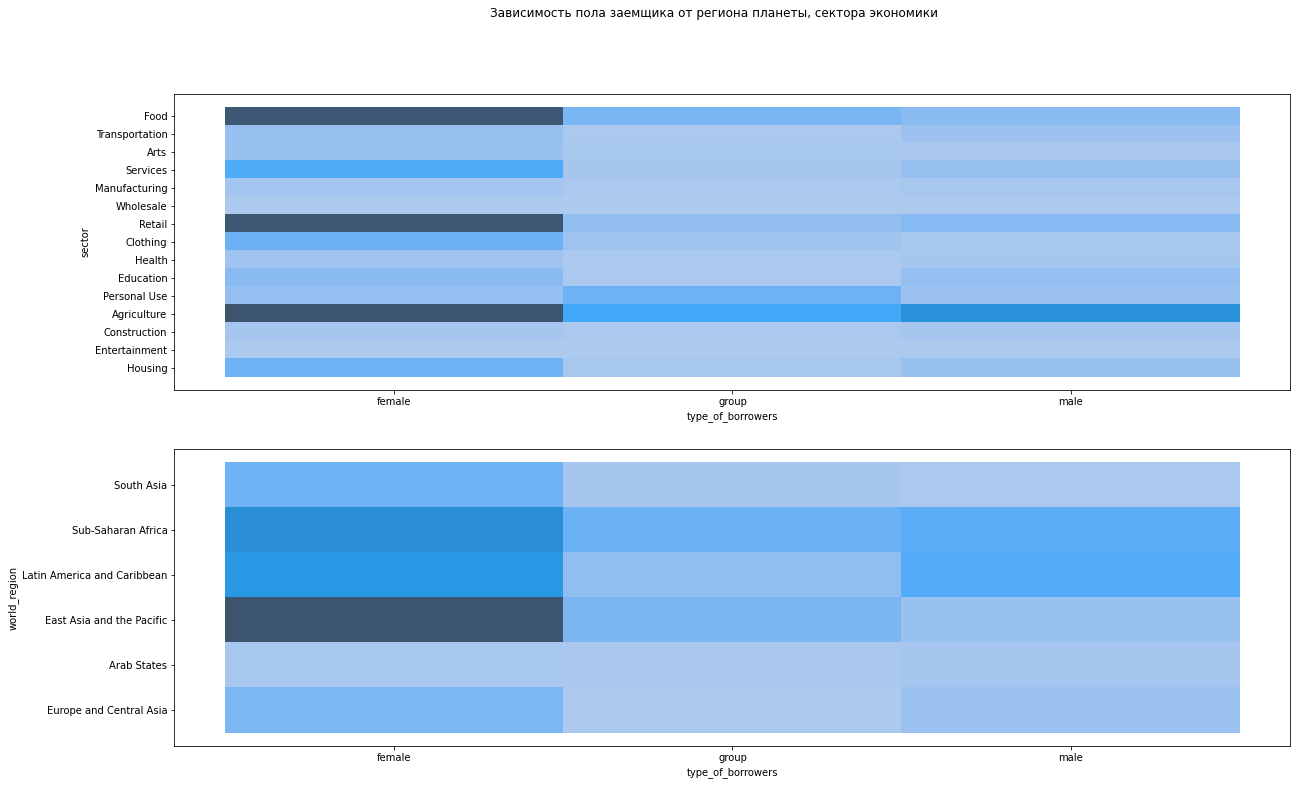

In [11]:
# build charts
lst=['sector', 'world_region']
fig, axes = plt.subplots(nrows=2, figsize=(20,12))
for i, col in enumerate(lst):
    sns.histplot(data=df_kiva_loans.merge(world_region, on='country'), x='type_of_borrowers', y=col, ax=axes.ravel()[i])
fig.suptitle('Зависимость пола заемщика от региона планеты, сектора экономики')

---

Text(0.5, 0.98, 'Влияние Количество кредиторов (lender_count) на суммы и сроки займов')

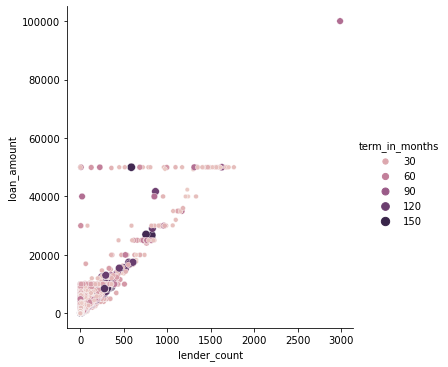

In [12]:
# build charts
sns.relplot(data=df_kiva_loans, x='lender_count', y='loan_amount', hue='term_in_months', size='term_in_months')
fig.suptitle('Влияние Количество кредиторов (lender_count) на суммы и сроки займов')

---

In [13]:
# creat dataframes for visualization
df42_3=df_kiva_loans.merge(df_mpi[['MPI', 'country']])

Text(0.5, 0.98, 'Влияние показателя MPI (многомерный индекс бедности) в разных странах на суммы займов и сроки погашения')

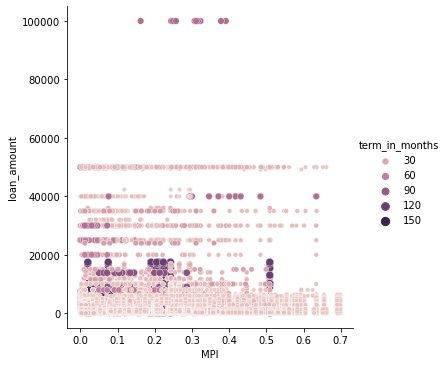

In [14]:
# build charts
sns.relplot(data=df42_3, x='MPI', y='loan_amount', hue='term_in_months', size='term_in_months')
fig.suptitle('Влияние показателя MPI (многомерный индекс бедности) в разных странах на суммы займов и сроки погашения')

---

In [17]:
# creat dataframes for visualization
l=[]
df44=df_kiva_loans[['loan_amount', 'term_in_months', 'posted_time', 'funded_time', 'repayment_interval', 'country']].dropna().reset_index()
for i in range(len(df44)):
    a=datetime.datetime.strptime(df44['funded_time'][i][0:10], '%Y-%m-%d')-datetime.datetime.strptime(df44['posted_time'][i][0:10], '%Y-%m-%d')
    l.append(a.days)
df44['time_of_funding']=l
df44

,index,loan_amount,term_in_months,posted_time,funded_time,repayment_interval,country,time_of_funding
0,0,300.0,12.0,2014-01-01 06:12:39+00:00,2014-01-02 10:06:32+00:00,irregular,Pakistan,1
1,1,575.0,11.0,2014-01-01 06:51:08+00:00,2014-01-02 09:17:23+00:00,irregular,Pakistan,1
2,2,150.0,43.0,2014-01-01 09:58:07+00:00,2014-01-01 16:01:36+00:00,bullet,India,0
3,3,200.0,11.0,2014-01-01 08:03:11+00:00,2014-01-01 13:00:00+00:00,irregular,Pakistan,0
4,4,400.0,14.0,2014-01-01 11:53:19+00:00,2014-01-01 19:18:51+00:00,monthly,Pakistan,0
...,...,...,...,...,...,...,...,...
622869,671166,25.0,13.0,2017-07-21 06:36:35+00:00,2017-07-22 12:51:42+00:00,monthly,Kenya,1
622870,671170,25.0,13.0,2017-07-21 21:46:10+00:00,2017-07-22 13:07:29+00:00,monthly,Pakistan,1
622871,671177,25.0,13.0,2017-07-22 06:04:07+00:00,2017-07-24 12:44:16+00:00,monthly,Kenya,2
622872,671186,25.0,13.0,2017-07-24 08:09:10+00:00,2017-07-25 00:19:01+00:00,monthly,Paraguay,1


In [18]:
df44['summ']=df44[df44.repayment_interval == 'monthly']['loan_amount'] / df44[df44.repayment_interval == 'monthly']['term_in_months']

Text(0.5, 0.98, 'Зависимости таких метрик, как «Сумма займа», «Срок займа», «Время финансирования заявки», «Ежемесячный платёж», в разрезе макрорегионов.')

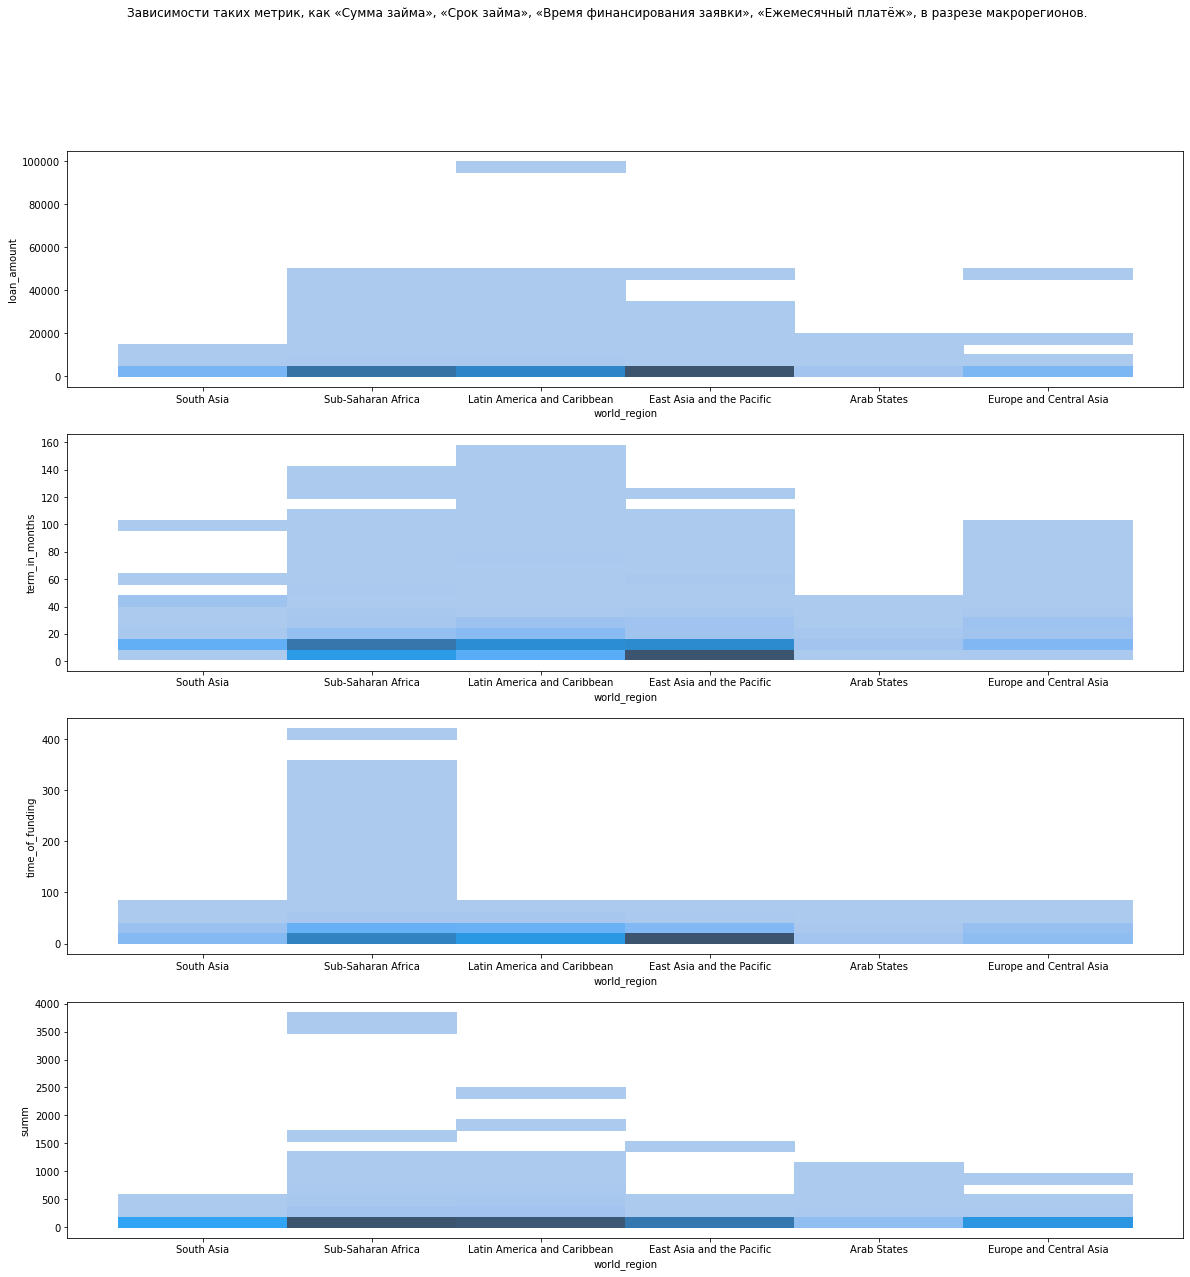

In [19]:
# build charts
lst=['loan_amount', 'term_in_months', 'time_of_funding', 'summ']
fig, axes = plt.subplots(nrows=len(lst), figsize=(20,20))
for i, col in enumerate(lst):
    sns.histplot(data=df44.merge(world_region, on='country'), x='world_region', y=col, ax=axes.ravel()[i], bins=20)
fig.suptitle('Зависимости таких метрик, как «Сумма займа», «Срок займа», «Время финансирования заявки», «Ежемесячный платёж», в разрезе макрорегионов.')